In [1]:
# Connect to my google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Load my model
from keras.models import load_model
new_model =load_model("/content/gdrive/MyDrive/self driving car/drivable area/withou2kimages.h5", compile=False)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

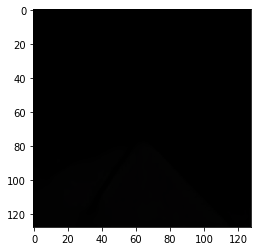

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128

img = np.zeros((1, IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)
curIm = np.array(cv2.imread("/content/gdrive/MyDrive/self driving car/lane detection/road.jpeg"))
curIm = cv2.resize(curIm, (IMAGE_WIDTH,IMAGE_HEIGHT))
img[0] = curIm  / 255 # Normalize to 0-1

prd_img = new_model.predict(img)
#prd_img = cv2.cvtColor(prd_img[0], cv2.COLOR_BGR2GRAY)

plt.imshow(prd_img[0])

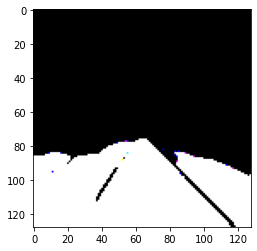

In [4]:
prd_img[0] = (prd_img[0] > 0.001)
plt.imshow(prd_img[0])

In [5]:
print(prd_img.shape)
print(img[0].shape)

(1, 128, 128, 3)
(128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


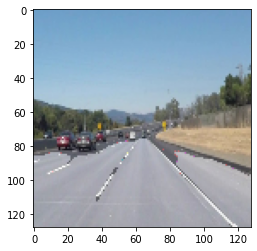

In [6]:
combo_image = cv2.addWeighted(prd_img[0], 0.3, img[0], 1, 0)
combo_image = cv2.cvtColor(combo_image, cv2.COLOR_BGR2RGB)
plt.imshow(combo_image)

In [9]:
!mkdir forVideo
!mkdir makeVideo

mkdir: cannot create directory ‘forVideo’: File exists
mkdir: cannot create directory ‘makeVideo’: File exists


In [7]:
# get every frame of my video

import cv2
import numpy as np
import matplotlib.pyplot as plt

vidcap = cv2.VideoCapture('/content/gdrive/MyDrive/self driving car/drivable area/20210304_150901.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("/content/forVideo/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128

def preproces_img(img):
    img = np.array(img)
    img = cv2.resize(img, (IMAGE_WIDTH,IMAGE_HEIGHT))
    img = img / 255
    return img


In [9]:
f = cv2.imread("/content/forVideo/frame0.jpg")
height, width, layers = f.shape 
def write_image(path, img):

    img = cv2.resize(img, (width,height))
    img = cv2.convertScaleAbs(img, alpha=(255.0))
    cv2.imwrite(path, img)

In [16]:
from tqdm import tqdm
import os

images_path = "/content/forVideo"


for img_name in tqdm(os.listdir(images_path), total=len(os.listdir(images_path))):
    images_array = np.zeros((1, IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)
    
    image_path = os.path.join(images_path, img_name)
    image = cv2.imread(image_path)
    image = preproces_img(image)
    images_array[0] = image
    prd_img = new_model.predict(images_array)
    prd_img[0] = (prd_img[0] > 0.001)
    combo_image = cv2.addWeighted(prd_img[0], 0.55, images_array[0], 1, 0)

    #Save image
    write_image(f"/content/makeVideo/{img_name}", combo_image)

100%|██████████| 193/193 [00:27<00:00,  6.90it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


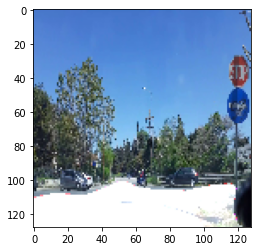

In [15]:
image_path = "/content/forVideo/frame107.jpg"
images_array = np.zeros((1, IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)

image = cv2.imread(image_path)
image = preproces_img(image)
images_array[0] = image
prd_img = new_model.predict(images_array)
prd_img[0] = (prd_img[0] > 0.001)
combo_image = cv2.addWeighted(prd_img[0], 0.55, images_array[0], 1, 0)
combo_image = cv2.cvtColor(combo_image, cv2.COLOR_BGR2RGB)

plt.imshow(combo_image)

In [17]:
# make my video
fps = 8.0
image_folder = '/content/makeVideo'
video_name = 'without2k.mp4'
num_of_images = os.listdir(image_folder)
num_of_images = len(num_of_images)
images = []
for _ in range(0, num_of_images, 1):
    images.append(f"{image_folder}/frame{_}.jpg")


frame = cv2.imread(images[0])
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
video = cv2.VideoWriter(video_name, fourcc, fps, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [99]:
stop

NameError: ignored

In [18]:
!mv /content/without2k.mp4 "/content/gdrive/MyDrive/self driving car/drivable area/"
print("DONE")

DONE


In [15]:
# clear my dir
directory = "/content/makeVideo"
for img in os.listdir(directory):
    curPath = f"{directory}/{img}"
    !rm $curPath